In [ ]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('book.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
#Removing duplicates (if available)
data = data.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Handling missing values
data = data.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply Apriori algorithm
def apply_apriori(data, min_support, min_confidence, min_length):
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    rules = rules[rules['antecedents'].apply(lambda x: len(x) >= min_length)]
    return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize rules using different plots
def visualize_rules(rules, plot_type='scatter'):
    if plot_type == 'scatter':
        plt.figure(figsize=(10,6))
        plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Support vs Confidence')
        plt.show()
    elif plot_type == 'histogram':
        plt.figure(figsize=(10,6))
        plt.hist(rules['lift'], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('Lift')
        plt.ylabel('Frequency')
        plt.title('Histogram of Lift')
        plt.show()
    elif plot_type == 'heatmap':
        plt.figure(figsize=(10,6))
        sns.heatmap(rules.corr(), annot=True)
        plt.title('Correlation Heatmap of Rules')
        plt.show()
    else:
        print("Invalid plot type. Choose from 'scatter', 'histogram', or 'heatmap'.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Number of rules: 313


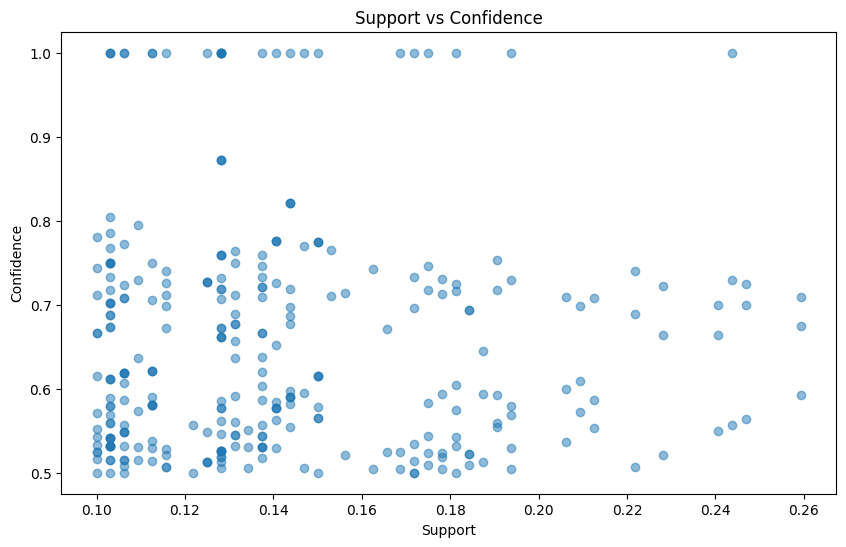

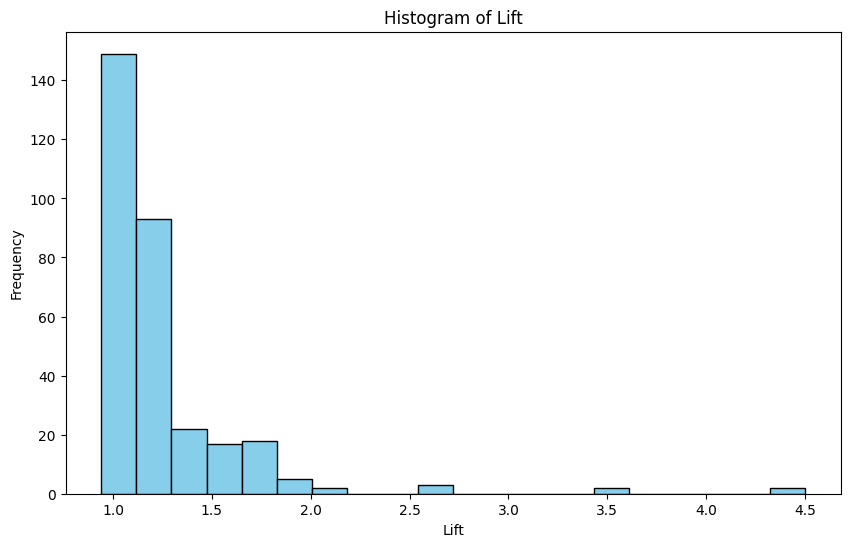

<ipython-input-7-1e4a34306faa>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rules.corr(), annot=True)


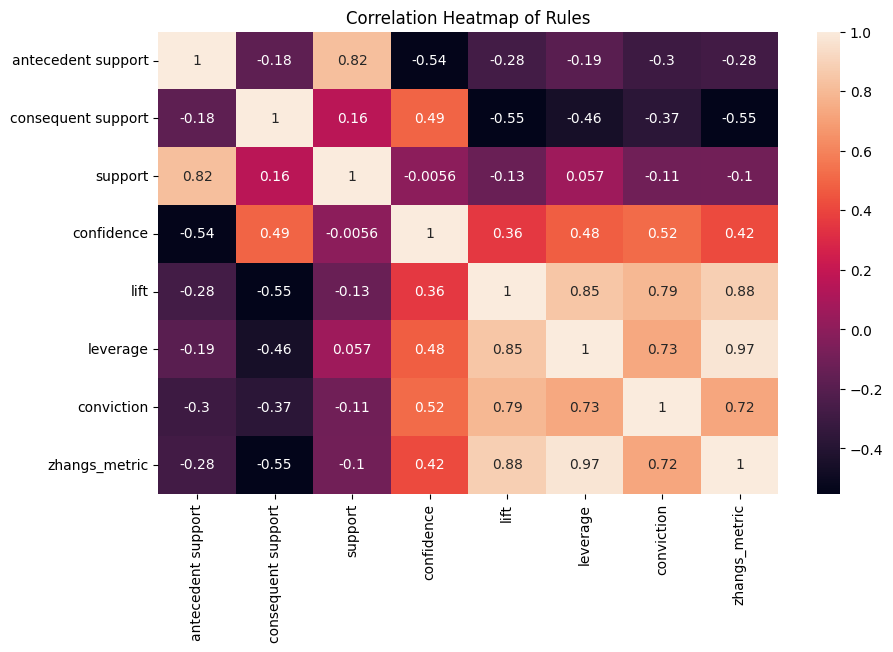

In [ ]:
min_support = 0.1
min_confidence = 0.5
min_length = 2

rules = apply_apriori(data, min_support, min_confidence, min_length)
print("Number of rules:", len(rules))

visualize_rules(rules, plot_type='scatter')
visualize_rules(rules, plot_type='histogram')
visualize_rules(rules, plot_type='heatmap')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Number of rules: 514


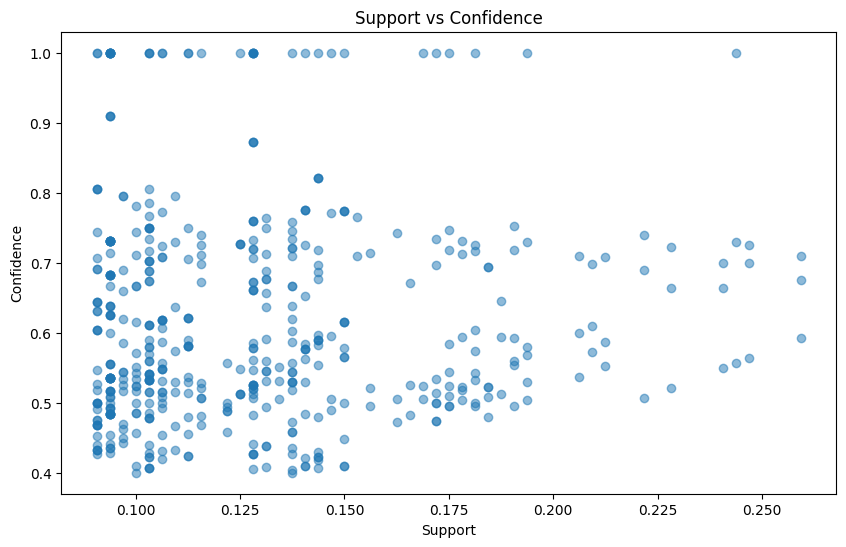

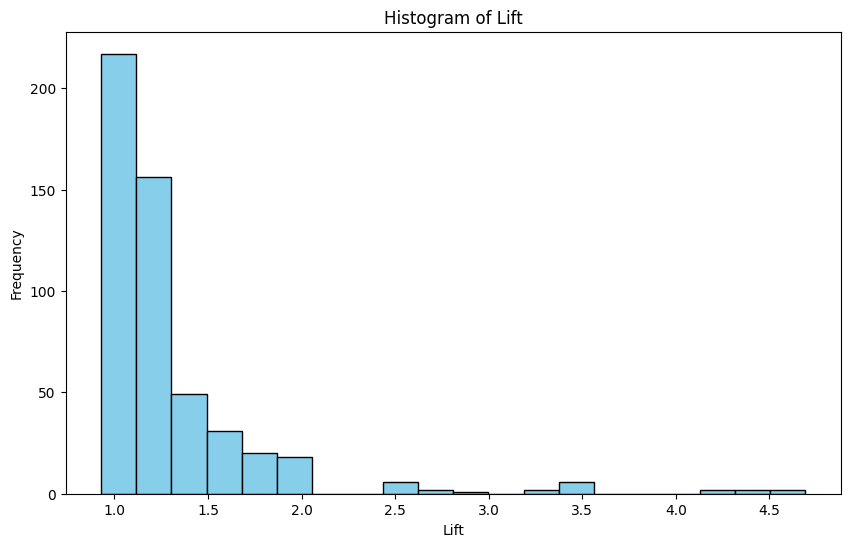

<ipython-input-7-1e4a34306faa>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rules.corr(), annot=True)


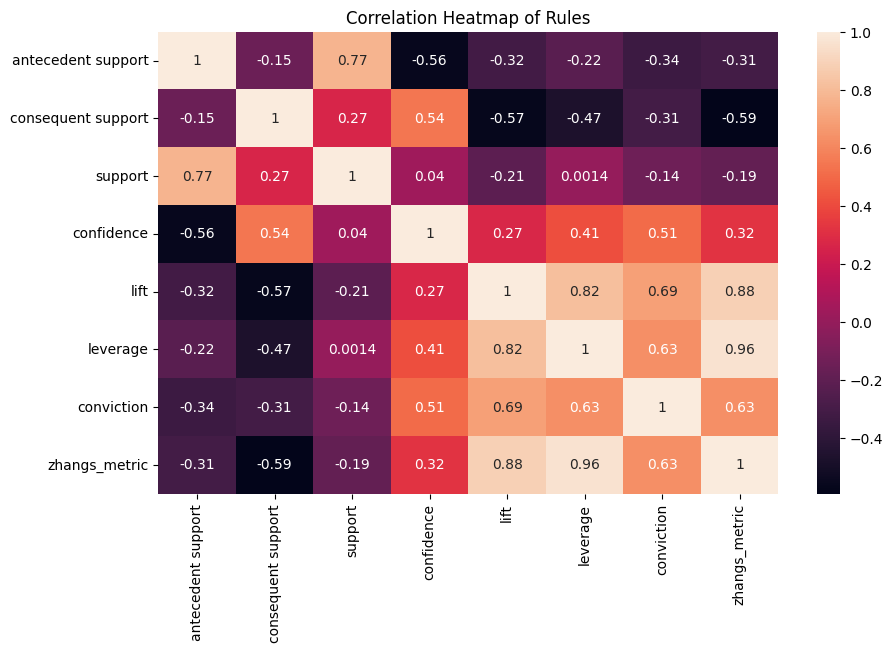

In [ ]:
min_support = 0.09
min_confidence = 0.4
min_length = 1.9

rules = apply_apriori(data, min_support, min_confidence, min_length)
print("Number of rules:", len(rules))

visualize_rules(rules, plot_type='scatter')
visualize_rules(rules, plot_type='histogram')
visualize_rules(rules, plot_type='heatmap')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Number of rules: 931


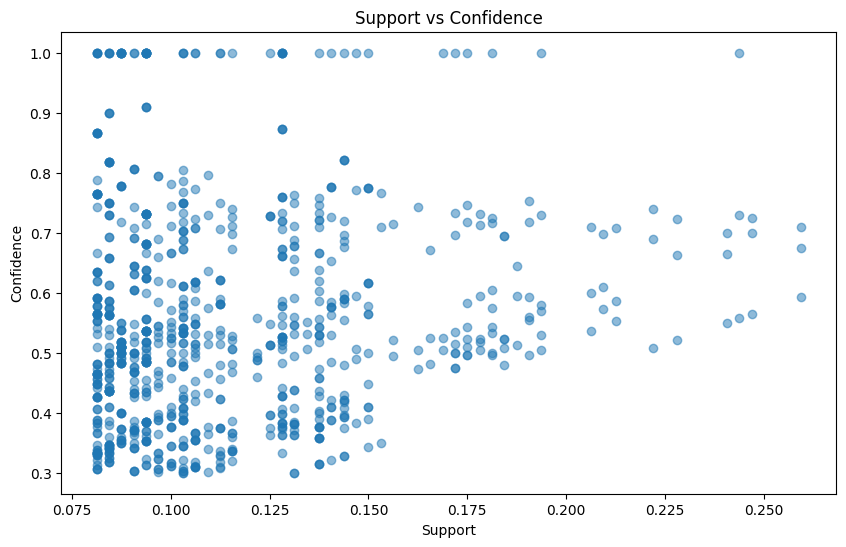

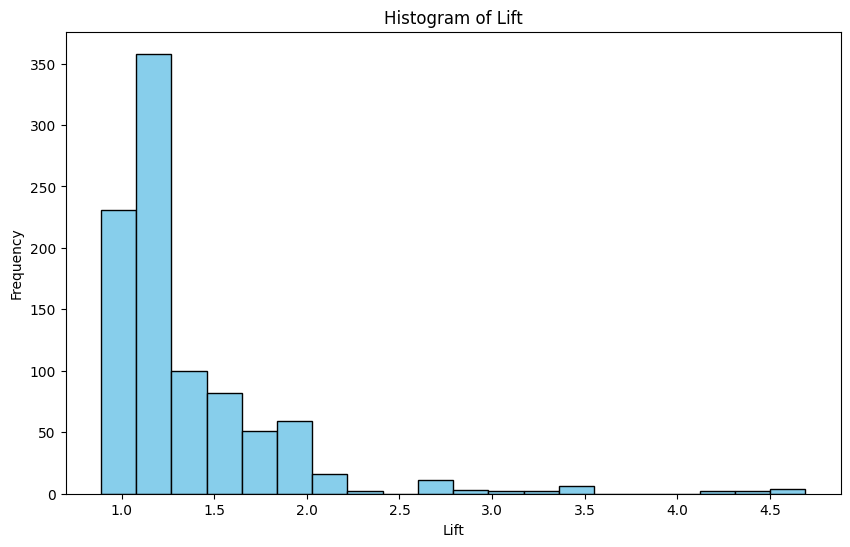

<ipython-input-7-1e4a34306faa>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rules.corr(), annot=True)


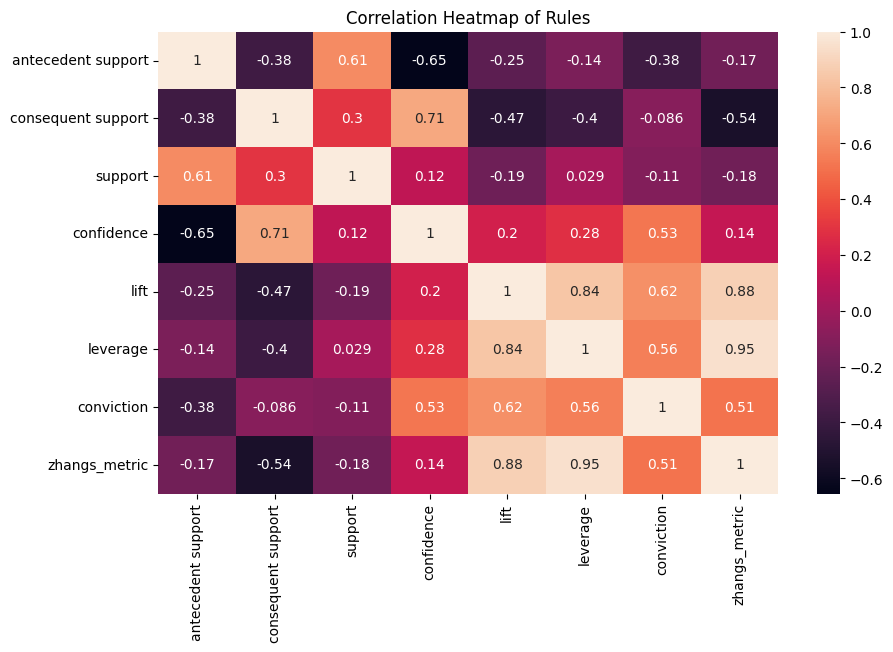

In [ ]:
min_support = 0.08
min_confidence = 0.3
min_length = 1.8

rules = apply_apriori(data, min_support, min_confidence, min_length)
print("Number of rules:", len(rules))

visualize_rules(rules, plot_type='scatter')
visualize_rules(rules, plot_type='histogram')
visualize_rules(rules, plot_type='heatmap')

#From above Plots wee can say as minimum support is decreasing the frequency value is increasing